# CS145 Howework 3, Part 2: Neural Networks

<span style="color:red"> **Important Note:** </span>
HW3 is due on **11:59 PM PT, May 15 (Monday)**. Please submit through GradeScope.

Note that Howework #3 includes two jupyter notebooks (Part 1: kNN and Part 2: Neural Network), please merge the reports into one pdf in your submission.

----

## Print Out Your Name and UID

<span style="color:blue"> **Name: Warren Pagsuguiron, UID: 205314301** </span>

----

## Before You Start

You need to first create HW3 conda environment specified in `cs145hw3.yml` file. If you have `conda` properly installed, you may create, activate or deactivate the env with the following commands:

```
conda env create -f cs145hw3.yml
conda activate hw3
conda deactivate
```
OR

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw3.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

References can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You must not delete any code cells in this notebook. If you change any code outside the blocks (such as hyperparameters) that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

## Section 1: Backpropagation in a Neural Network

<span style="color:red"> Note: Section 1 is "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator), which helps you understand the back propagation in neural networks. </span>

In this question, let's consider a two-layer neural network and manually perform the forward and backward pass.
For simplicity, we assume the input data is two dimensional.
The model architecture is visualized in the figure below.
Note that here we include the term `b` explicitly for each layer in the diagram.
Recall the formula for computing $\mathbf{x^{(l)}}$ in the l-th layer from $\mathbf{x^{(l-1)}}$ in the (l-1)-th layer is $\mathbf{x^{(l)}} = \mathbf{f^{(l)}(W^{(l)} x^{(l-1)} + b^{(l)})}$.
We use is the `sigmoid` as the activation function, i.e. $\mathbf{f^{(l)}}(z) = \frac{1}{1+\exp(-z)}$.
We use MSE as the loss function: $l\mathbf{(y, \hat y)} = \frac{1}{2} ||\mathbf{y - \hat y}||^2$, where $\hat y$ is the output ($\mathbf{x}^{(2)}$) in our example.

<img src="nn.png"  width="350"/>

We initialize our weights as
$$\mathbf{W^{(1)}} = \begin{bmatrix}
0.15 & 0.2 \\
0.25 & 0.3 
\end{bmatrix} \in \mathbb{R}^{d^{(1)}\times d^{(0)}},
\quad \mathbf{W^{(2)}} = [0.4, 0.45],
\quad \mathbf{b^{(1)}} = \begin{bmatrix}0.35 \\ 0.35\end{bmatrix},
\quad \mathbf{b^{(2)}} = 0.6$$

TODO: specify the dimensionality of those vectors

### Forward pass

**Questions**

1. For input $\mathbf{x^{(0)}} = \begin{bmatrix}0.05 \\ 0.1\end{bmatrix}$, compute $\mathbf{x^{(1)}}$ (Show your work).

2. From $\mathbf{x^{(1)}}$, compute $\mathbf{x^{(2)}}$ in the output layer (Show your work).
   
3. If the target value $y = 0.01$, compute the MSE loss from $\mathbf{x^{(2)}}$ (Show your work).

**Answers:**

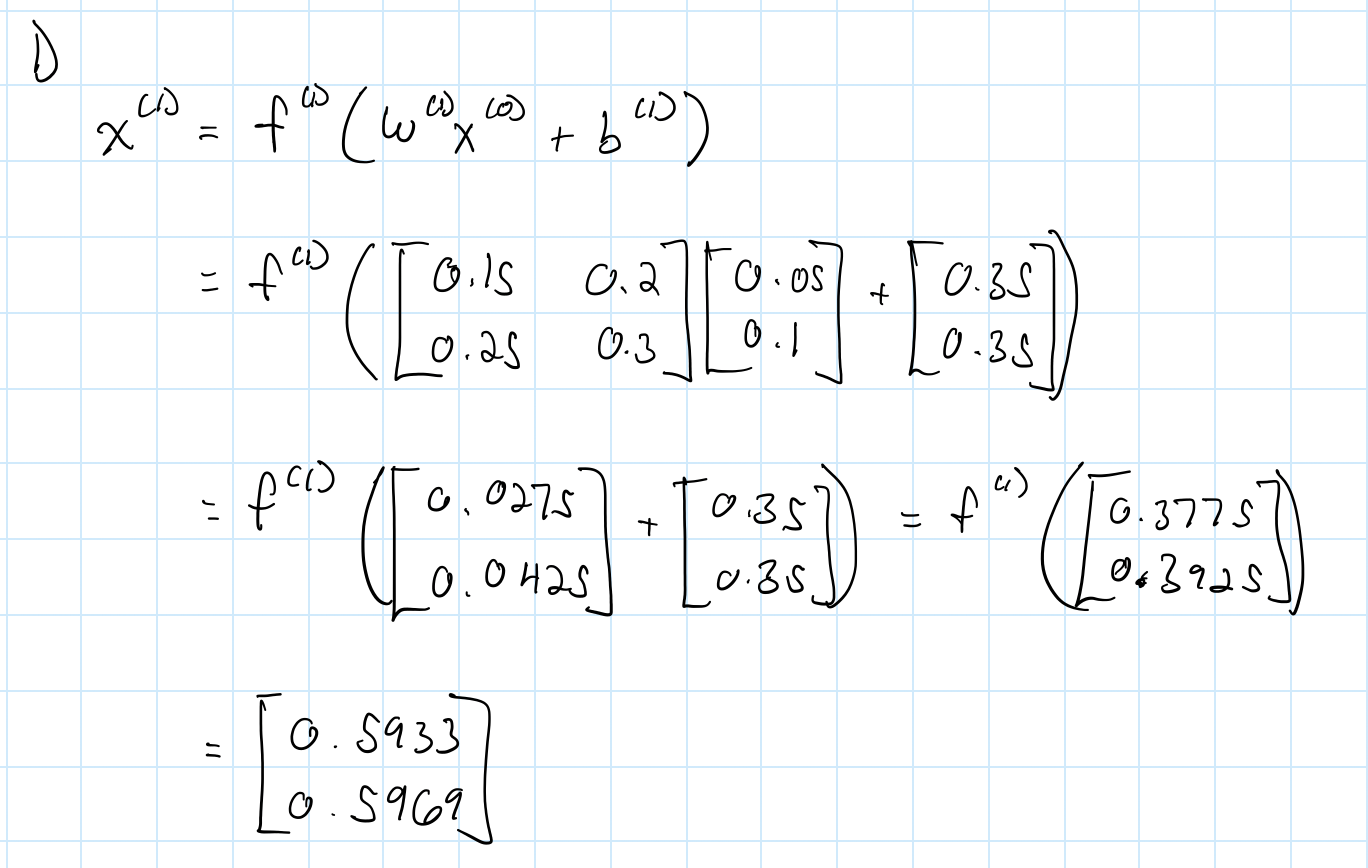

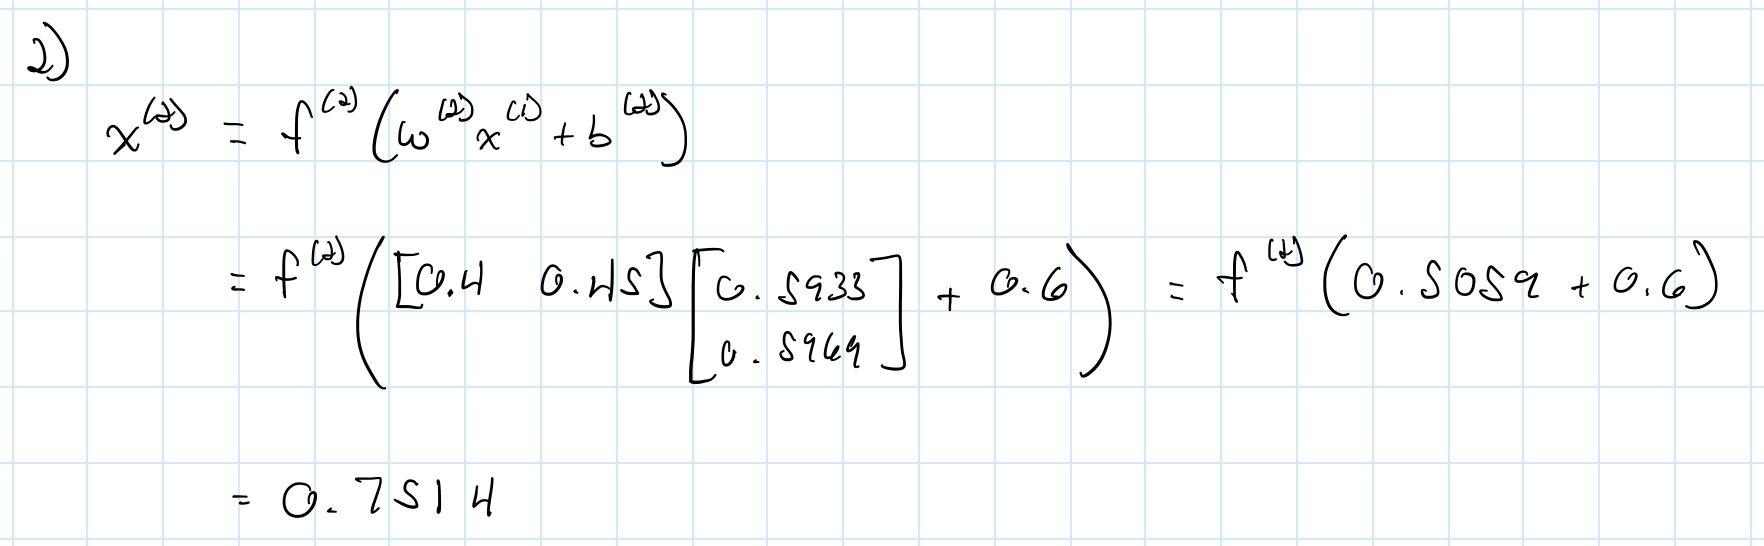

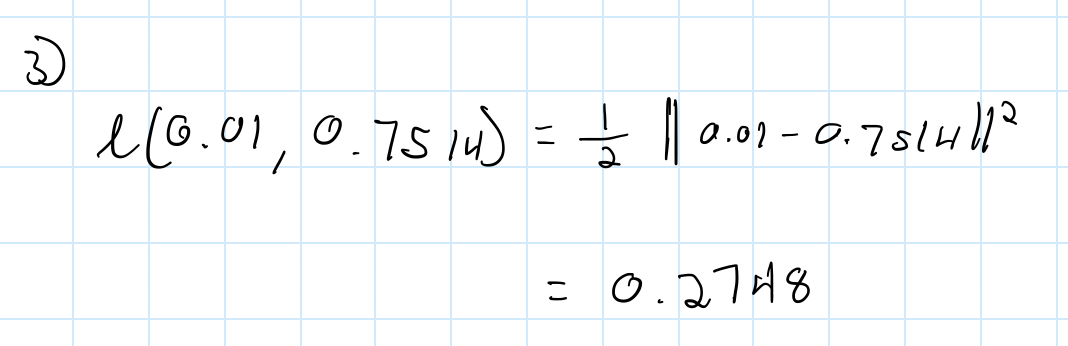

### Backward pass

After the forward process, we can perform a backward pass to compute the gradient of the weights in the neural network.

**Questions**
1. Consider the loss $l$ over the same input $\mathbf{x^{(0)}} = \begin{bmatrix}0.05 \\ 0.1\end{bmatrix}$, calculate the gradient of $\mathbf{W^{(2)}}$ and $\mathbf{b^{(2)}}$, i.e. $\frac{\partial l}{\partial \mathbf{W^{(2)}}}$, $\frac{\partial l}{\partial \mathbf{b^{(2)}}}$  (Show your work).
   
2. Based on the result you computed in part 1, what will be the gradient of $\mathbf{W^{(1)}}$ and $\mathbf{b^{(1)}}$, i.e. $\frac{\partial l}{\partial \mathbf{W^{(1)}}}$, $\frac{\partial l}{\partial \mathbf{b^{(1)}}}$  (Show your work).

**Answers:**

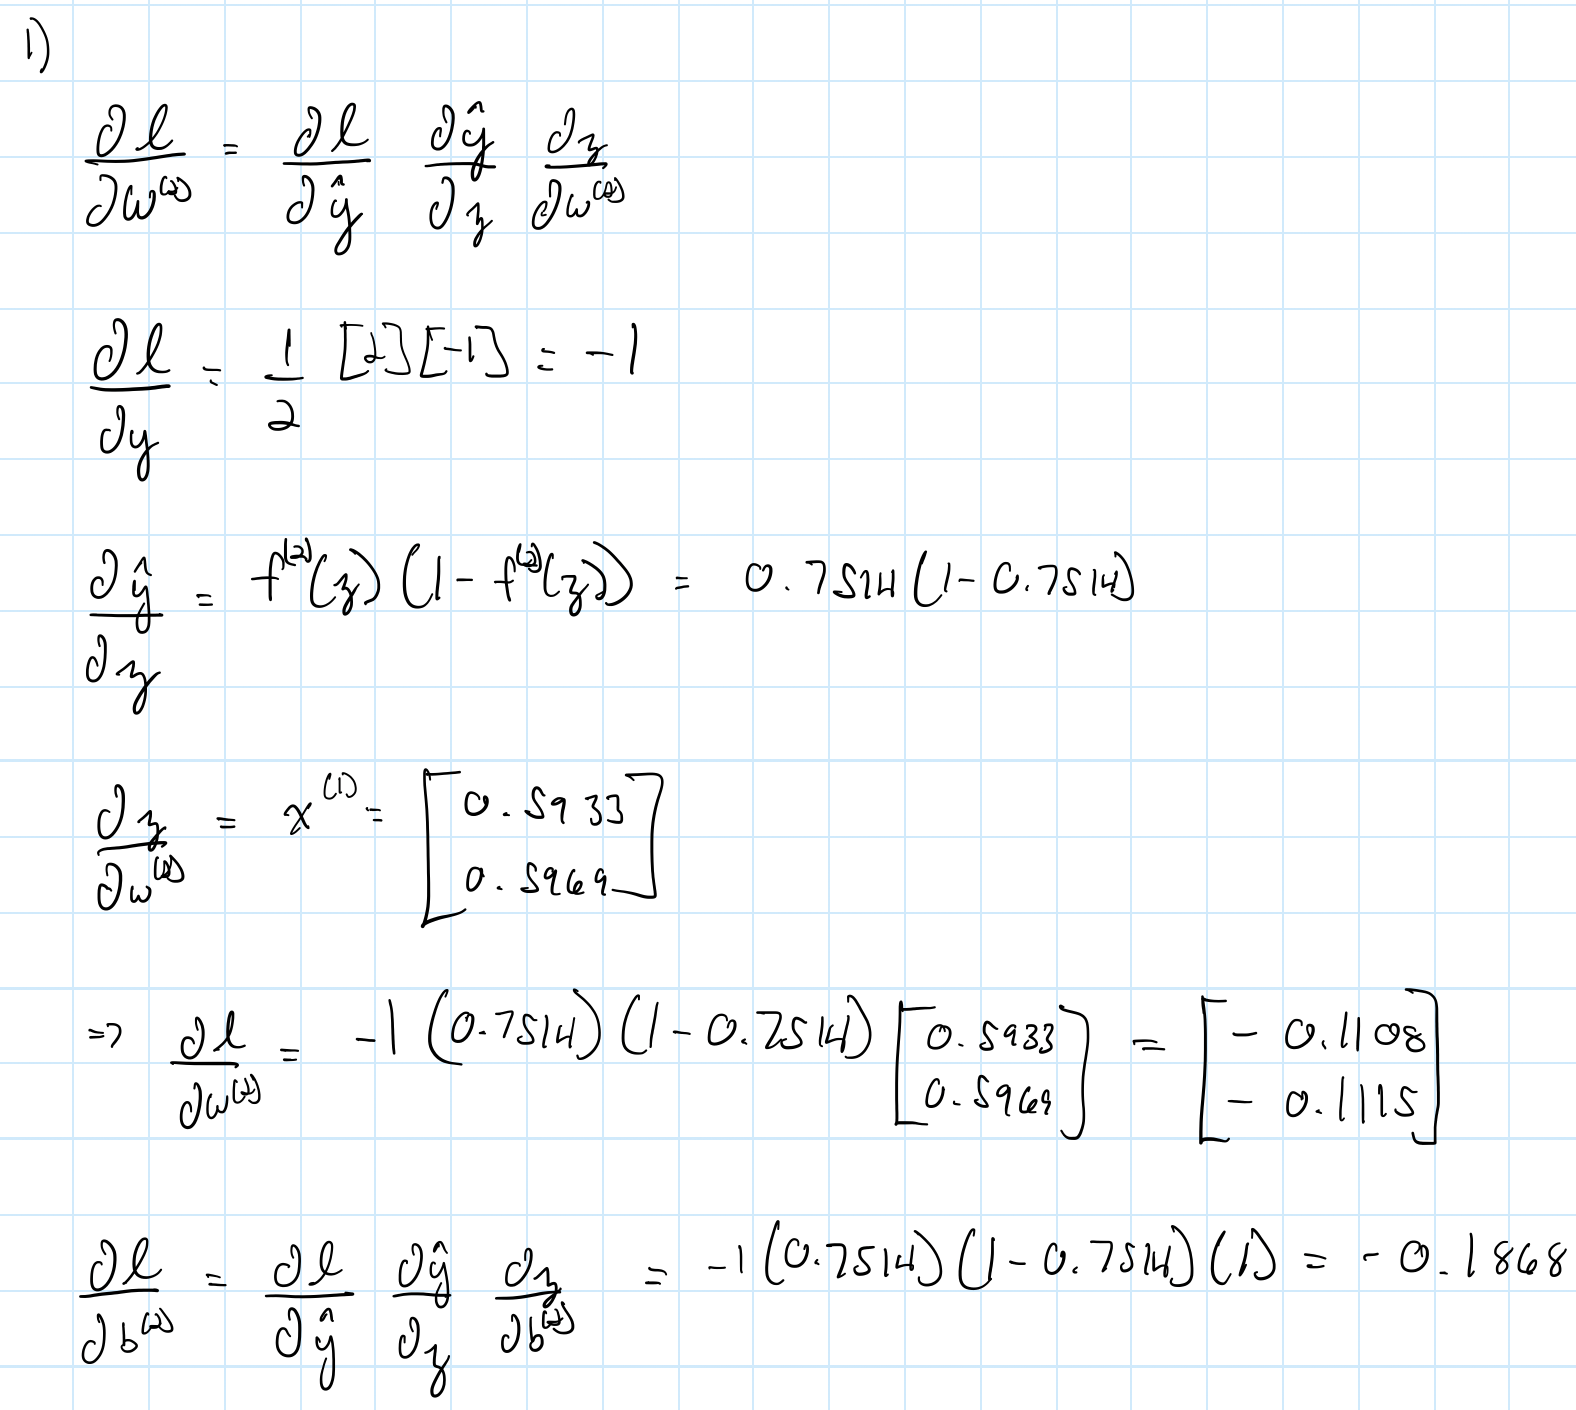

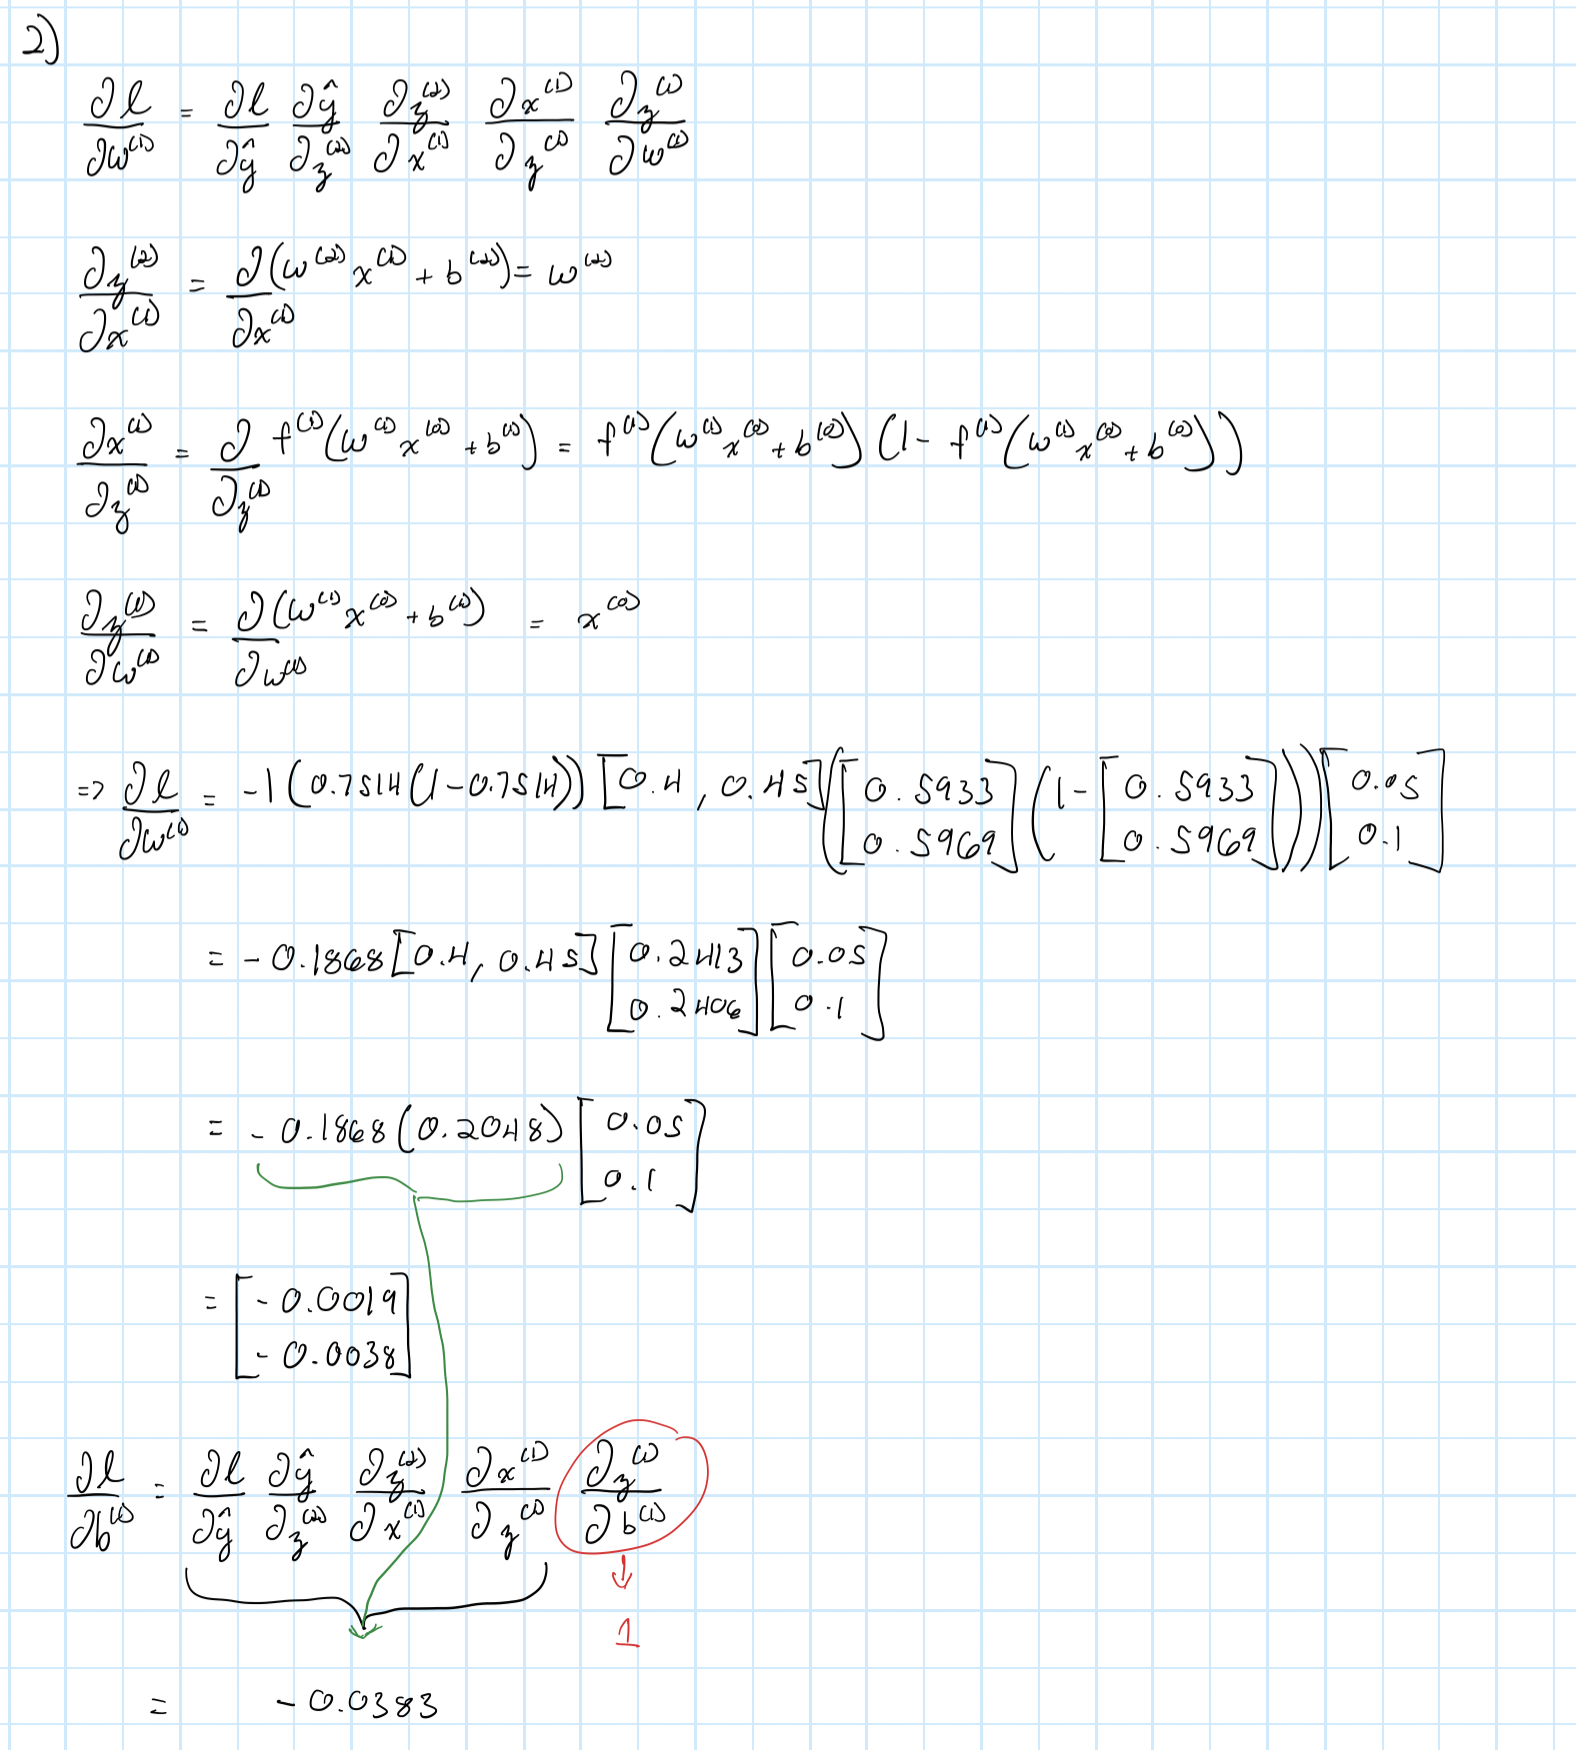

### Validate the analytical results

You may run the code below to validate your solution above.

In [35]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(2, 2, bias=True)
        self.l2 = nn.Linear(2, 1, bias=True)
        
        self.l1.weight.data = torch.Tensor([[0.15, 0.2], [0.25, 0.3]])
        self.l2.weight.data = torch.Tensor([[0.4, 0.45]])
        self.l1.bias.data = torch.Tensor([0.35, 0.35])
        self.l2.bias.data = torch.Tensor([0.6])
        
    
    def forward(self, x0):
        z1 = self.l1(x0)
        x1 = torch.sigmoid(z1)
        z2 = self.l2(x1)
        x2 = torch.sigmoid(z2)
        print("z1", z1)
        print("x1", x1)
        print("z2", z2)
        print("x2", x2)
        
        return x2

    def loss(self, x2, y):
        l = nn.MSELoss()
        return 0.5 * l(x2, y)
        
x = torch.Tensor([0.05, 0.1])
y = torch.Tensor([0.01])
net = Net()
y_hat = net(x)
loss = net.loss(y_hat, y)
print(loss)
loss.backward()

print('-'*80)
print("W1", list(net.l1.parameters())[0].grad.numpy())
print("b1", list(net.l1.parameters())[1].grad.numpy())
print("W2", list(net.l2.parameters())[0].grad.numpy())
print("b2", list(net.l2.parameters())[1].grad.numpy())

z1 tensor([0.3775, 0.3925], grad_fn=<AddBackward0>)
x1 tensor([0.5933, 0.5969], grad_fn=<SigmoidBackward0>)
z2 tensor([1.1059], grad_fn=<AddBackward0>)
x2 tensor([0.7514], grad_fn=<SigmoidBackward0>)
tensor(0.2748, grad_fn=<MulBackward0>)
--------------------------------------------------------------------------------
W1 [[0.0006684  0.00133679]
 [0.0007498  0.00149961]]
b1 [0.01336792 0.01499607]
W2 [[0.08216704 0.08266763]]
b2 [0.13849856]


## Section 2: Implementing a two-layer neural network

Import libraries and define relative error function, which is used to check results later. 

In [36]:
import random
import numpy as np
from data.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass.

In [37]:
from hw3code.neural_net import TwoLayerNet

In [38]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [39]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.3812311957259755e-08


### Forward pass loss

The total loss includes data loss (MSE) and regularization loss, which is,

$$L = L_{data}+L_{reg} = \frac{1}{2N}\sum_{i=1}^{N}\left(\boldsymbol{y}_{\text{pred}}-\boldsymbol{y}_{\text{target}}\right)^2 + \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

More specifically in multi-class situation, if the output of neural nets from one sample is $y_{\text{pred}}=(0.1,0.1,0.8)$ and $y_{\text{target}}=(0,0,1)$ from the given label, then the MSE error will be $Error=(0.1-0)^2+(0.1-0)^2+(0.8-1)^2=0.06$

Implement data loss and regularization loss. In the MSE function, you also need to return the gradients which need to be passed backward. This is similar to batch gradient in linear regression. Test your implementation of loss functions. The Difference should be less than 1e-12.

In [40]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss_MSE = 1.8973332763705641 # check this number

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss_MSE)))

Difference between your loss and correct loss:
0.0


### Backward pass (You do not need to implemented this part)

We have already implemented the backwards pass of the neural network for you.  Run the block of code to check your gradients with the gradient check utilities provided. The results should be automatically correct (tiny relative error).

If there is a gradient error larger than 1e-8, the training for neural networks later will be negatively affected.

In [43]:
from data.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 4.950799338590475e-10
b2 max relative error: 2.4554844805570154e-11
W1 max relative error: 1.7476683484843372e-09
b1 max relative error: 7.382451041178829e-10


### Training the network

Train the network via stochastic gradient descent, much like the linear regression.

Final training loss:  0.02950555626206818


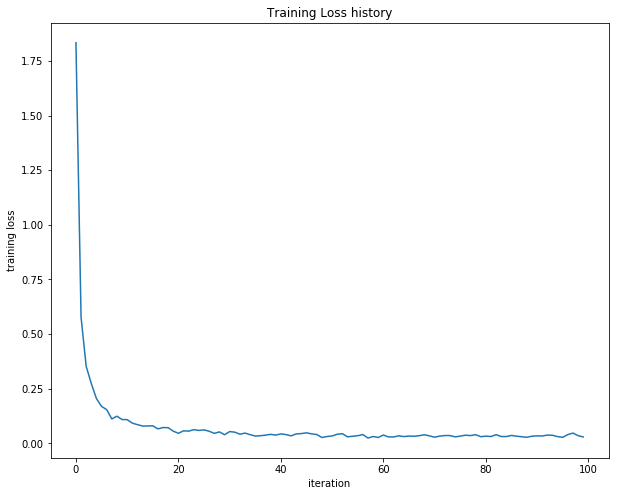

In [44]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [45]:
from data.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './data/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 15-18%.

In [58]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 0.5000836386531647
iteration 100 / 1000: loss 0.4999000305255334
iteration 200 / 1000: loss 0.4996600513809055
iteration 300 / 1000: loss 0.4994081215528872
iteration 400 / 1000: loss 0.49912427532016745
iteration 500 / 1000: loss 0.49867780171809706
iteration 600 / 1000: loss 0.4983066181051833
iteration 700 / 1000: loss 0.4974775565544865
iteration 800 / 1000: loss 0.4967067657581564
iteration 900 / 1000: loss 0.4952477147223812
Validation accuracy:  0.186


In [47]:
stats['train_acc_history']

[0.09, 0.15, 0.225, 0.195, 0.225]

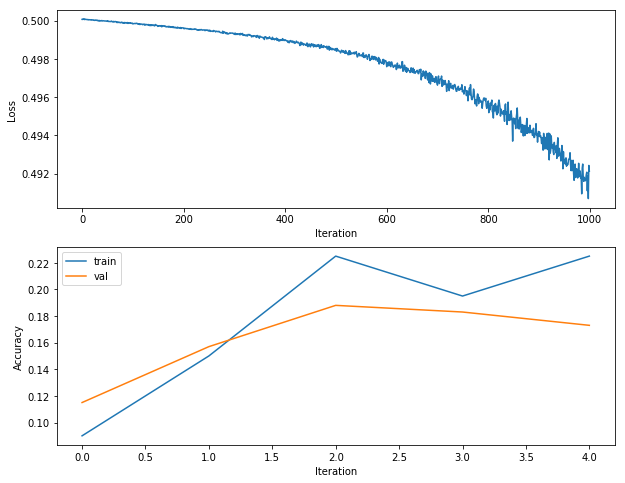

In [49]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Questions:**

The training accuracy isn't great. It seems even worse than simple KNN model, which is not as good as expected.

(1) Identify some potential reasons for this result?

(2) How should you fix the problems you identified in (1)?

**Answers:**
1. We may need more data to train the model
2. we may need more layers for our model
3. the hyperparameters aren't properly tuned


1 and 2 can't be fixeed because of the constraints of this problem, so we have to focus on 3. I can uses techniques such as cross-validation or grid search to find the best hyperparameters

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets in `best_net` variable. To get the full credit of the neural nets, you should get at least **45%** accuracy on validation set. 

**Reminder: Think about whether you should retrain a new model from scratch every time your try a new set of hyperparameters.** \
**Hint: potential hyperparameters include batch size, learning rate, regularization.** \
**Hint: You can achieve > 45% without changing the number of iterations (i.e. 1000).**

In [59]:
best_net = None # store the best model into this 

input_size = 32 * 32 * 3 # do not change
hidden_size = 50 # do not change
num_classes = 10 # do not change
best_valacc = 0 # record and update your best model validation accuracy
best_net = None # store your best network

# ================================================================ #
# START YOUR CODE HERE:
# ================================================================ #
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 45% validation accuracy.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# todo: optimal parameter search (you can use grid search with for-loops
learning_rate = [0.001, 0.0001, 0.00001]
regularization = [0.01, 0.001, 0.0001, 0.000001]
batch_size = [300, 400, 500]

best_lr = 0
best_reg = 0
best_bs = 200
for lr in learning_rate:
    for reg in regularization:
        print(f'learning rate: {lr}, regularization: {reg}')
        # Train the network
        my_net = TwoLayerNet(input_size, hidden_size, num_classes)
        stats = my_net.train(X_train, y_train, X_val, y_val,
                    num_iters=1000, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=reg, verbose=False)

        # Predict on the validation set
        val_acc = (my_net.predict(X_val) == y_val).mean()
        print('Validation accuracy: ', val_acc)
        if val_acc > best_valacc:
            best_valacc = val_acc
            best_lr = lr
            best_reg = reg
            best_net = my_net

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
# Output your results
print("== Best parameter settings ==")
# print your best parameter setting here!
print(f'Best learning rate: {best_lr}, best regularization: {best_reg}')
print("Best accuracy on validation set: {}".format(best_valacc))

learning rate: 0.001, regularization: 0.01
Validation accuracy:  0.47
learning rate: 0.001, regularization: 0.001
Validation accuracy:  0.454
learning rate: 0.001, regularization: 0.0001
Validation accuracy:  0.473
learning rate: 0.001, regularization: 1e-06
Validation accuracy:  0.47
learning rate: 0.0001, regularization: 0.01
Validation accuracy:  0.32
learning rate: 0.0001, regularization: 0.001
Validation accuracy:  0.312
learning rate: 0.0001, regularization: 0.0001
Validation accuracy:  0.321
learning rate: 0.0001, regularization: 1e-06
Validation accuracy:  0.319
learning rate: 1e-05, regularization: 0.01
Validation accuracy:  0.15
learning rate: 1e-05, regularization: 0.001
Validation accuracy:  0.152
learning rate: 1e-05, regularization: 0.0001
Validation accuracy:  0.168
learning rate: 1e-05, regularization: 1e-06
Validation accuracy:  0.16
== Best parameter settings ==
Best learning rate: 0.001, best regularization: 0.0001
Best accuracy on validation set: 0.473


**Quesions**

(1) What is your best parameter settings? (Output from the previous cell)

**Answers**

Best learning rate = 0.001
Best regularization = 0.0001
Best batch size (didn't test) = 200

---

## Visualize the weights of your neural networks

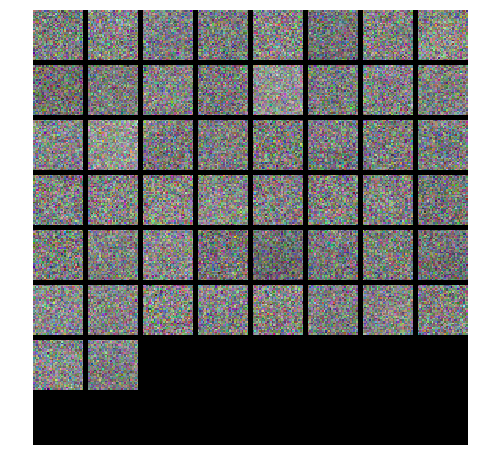

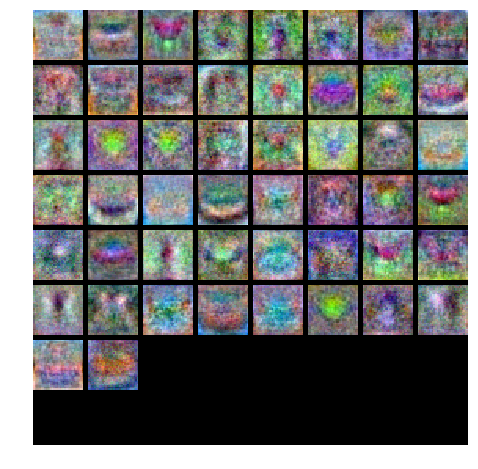

In [60]:
from data.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

**Questions:**

What's the difference between the weights in the suboptimal net and the best net? What did the weights in neural networks learn after training?

**Answer:**

It looks like the best net found patterns amongst the data and set the weights appropriately whereas the suboptimal net's weights are random. This conclusion is from the visualizations of the weights above

---

## Evaluate on test set 

In [61]:
test_acc = (best_net.predict(X_test) == y_test).mean()
#test_acc = (subopt_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.46


----

## End of Homework 3, Part 2

After you've finished both parts the homework, please export your ipynbs from two parts into two PDFs, and merge them into a single PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Do not include any dataset in your submission.  